In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split
from sklearn.decomposition import PCA
import tldextract
import re
import itertools
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('hr36_36_12_6_2_binsize1all_features_5_23.csv')

In [3]:
df

,patientunitstayid,label,mean_mean_hr36_full,min_mean_hr36_full,max_mean_hr36_full,sd_mean_hr36_full,range_mean_hr36_full,mean_min_hr36_full,min_min_hr36_full,max_min_hr36_full,...,Syst_card,Syst_gi,Syst_gu,Syst_misc,Syst_muscsk,Syst_neuro,Syst_None,Syst_pulm,Syst_resp,Syst_vasc
0,141695,no_ADR,75.095238,73.000000,76.285714,1.820144,3.285714,72.666667,70.0,74.0,...,0,0,0,0,0,0,0,0,1,0
1,141894,ADR,70.247253,65.076923,82.000000,4.676341,16.923077,65.285714,58.0,74.0,...,1,0,0,0,0,0,0,0,0,0
2,142173,no_ADR,75.541667,69.666667,78.750000,2.158639,9.083333,73.944444,69.0,78.0,...,0,0,0,0,0,0,0,0,1,0
3,143057,no_ADR,61.987179,54.153846,71.230769,4.513210,17.076923,57.500000,50.0,66.0,...,0,0,0,0,0,1,0,0,0,0
4,143148,no_ADR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,3351997,no_ADR,64.381944,57.916667,92.166667,6.572048,34.250000,60.777778,55.0,77.0,...,0,0,0,0,0,1,0,0,0,0
2062,3352069,no_ADR,65.222222,61.461538,68.666667,3.612959,7.205128,62.000000,58.0,67.0,...,1,0,0,0,0,0,0,0,0,0
2063,3352269,no_ADR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
2064,3352487,no_ADR,94.298810,89.500000,98.500000,2.128364,9.000000,90.571429,86.0,93.0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
print("Missing Values:", df.isnull().sum())

Missing Values: patientunitstayid        0
label                    0
mean_mean_hr36_full    336
min_mean_hr36_full     336
max_mean_hr36_full     336
                      ... 
Syst_neuro               0
Syst_None                0
Syst_pulm                0
Syst_resp                0
Syst_vasc                0
Length: 194, dtype: int64


In [5]:
for var in df:
    print(df[var].unique().shape[0], "unique Values of", var, df[var].unique(), "\n")

2066 unique Values of patientunitstayid [ 141695  141894  142173 ... 3352269 3352487 3352525] 

2 unique Values of label ['no_ADR' 'ADR'] 

1706 unique Values of mean_mean_hr36_full [75.0952381  70.24725275 75.54166667 ... 65.22222222 94.29880952
 64.07596372] 

861 unique Values of min_mean_hr36_full [ 73.          65.07692308  69.66666667  54.15384615          nan
  61.83333333  59.58333333  60.          44.33333333  73.33333333
  59.33333333  82.66666667  61.41666667  59.83333333  73.08333333
  55.41666667  78.83333333  51.45833333  52.08333333 133.5
  96.46153846  75.25        46.75        63.83333333  69.53846154
  51.33333333  71.16666667  61.33333333 111.8333333   62.83333333
  90.33333333  65.53846154  91.38461538  64.16666667  67.33333333
  59.66666667  80.58333333  65.38461538  60.33333333  47.84615385
  59.84615385  64.          82.77777778  64.69230769  56.66666667
  81.66666667  71.71428571  53.          56.25        74.90909091
 103.5         72.33333333  76.76923077  60.

1703 unique Values of mean_sd_hr36_last6 [1.27612735 3.80350141 0.82283436 ... 3.08753212 3.26908969 1.85875219] 

608 unique Values of min_sd_hr36_last6 [ 0.85280287  2.13637604  0.          1.28102523         nan  0.9653073
  0.71774056  1.30267789  1.33711585  0.66855792  2.19330939  1.16774842
  1.0298573   1.66969422  0.77849894  0.90033664  1.91485422  1.4500221
  0.46709937  1.62644299  0.77625003  1.24316312  1.55699789  0.98473193
  0.57735027  1.34839972  1.37803842  4.49358517  0.85485041  1.24011241
  3.35297245  2.23437334  0.96076892  1.43548112  0.51887452  1.89466187
  1.20604538  1.96946386  2.49871762  1.50755672  3.25087401  1.12815215
  1.04446594  2.48022482 10.44465936  2.48632624  1.13818037  0.51492865
  3.48590234  1.75119007  0.87705802  0.64051262  2.          0.83484711
  1.99240984  1.15470054  5.12510163  0.83666003  0.52223297  0.28867514
  0.70710678  0.79296146  1.91287504  2.84800125  1.75809815  1.11516355
  1.70560573  1.08362467  2.75494893  2.38683

78 unique Values of age3 [ 5.19041750e+03  4.34202223e+03 -6.55298896e+02  1.09723147e+03
  8.02935700e+01 -3.22640290e-01 -2.56340301e+03  2.93288611e+03
  2.51733665e+02 -6.52438708e+03  1.44831793e+03 -4.54023670e+02
  6.14269756e+03  2.26943919e+00 -5.00747479e+01 -2.98863642e+02
  3.09986760e-02 -4.64564785e+03 -2.04155179e+03  1.86728919e+03
  7.20486243e+03 -4.79147771e+00  3.59151177e+03  8.38291210e+03
 -7.62892949e+03  5.74712966e+02 -1.01983599e+04  8.08029819e+02
  3.91280915e+02  9.68284657e+03 -1.22019494e+03 -1.93755136e+01
 -1.83818812e+02  1.50071217e+02 -3.16736942e+03  3.64007249e+01
 -1.59581577e+03  1.23926813e+01 -5.78971230e+04 -1.32882511e+04
  2.36014525e+03 -1.02889181e+02 -3.49204639e+04 -5.35223918e+04
 -5.53195987e+03 -8.85158709e+03  1.26723699e+04 -1.90039519e+04
 -2.12214159e+04 -3.85945104e+03 -4.93737758e+04 -4.17308894e+04
 -1.50433695e+04  1.82207910e+04 -9.08689321e+02  2.03780342e+04
  1.11106658e+04  1.62214325e+04 -2.61606895e+04 -3.82246191e+04


# Drop Null Value

In [6]:
df.dropna(inplace=True)
df

,patientunitstayid,label,mean_mean_hr36_full,min_mean_hr36_full,max_mean_hr36_full,sd_mean_hr36_full,range_mean_hr36_full,mean_min_hr36_full,min_min_hr36_full,max_min_hr36_full,...,Syst_card,Syst_gi,Syst_gu,Syst_misc,Syst_muscsk,Syst_neuro,Syst_None,Syst_pulm,Syst_resp,Syst_vasc
0,141695,no_ADR,75.095238,73.000000,76.285714,1.820144,3.285714,72.666667,70.0,74.0,...,0,0,0,0,0,0,0,0,1,0
2,142173,no_ADR,75.541667,69.666667,78.750000,2.158639,9.083333,73.944444,69.0,78.0,...,0,0,0,0,0,0,0,0,1,0
6,144770,no_ADR,63.190972,59.583333,68.500000,2.600950,8.916667,61.361111,59.0,68.0,...,0,0,0,0,0,1,0,0,0,0
9,146552,no_ADR,65.833333,60.000000,81.833333,10.683147,21.833333,60.000000,60.0,60.0,...,0,0,0,0,0,0,0,0,1,0
10,146619,ADR,59.416667,44.333333,71.166667,12.269920,26.833333,57.000000,42.0,70.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,3351889,ADR,53.966667,52.000000,56.333333,1.833901,4.333333,51.600000,50.0,54.0,...,1,0,0,0,0,0,0,0,0,0
2061,3351997,no_ADR,64.381944,57.916667,92.166667,6.572048,34.250000,60.777778,55.0,77.0,...,0,0,0,0,0,1,0,0,0,0
2062,3352069,no_ADR,65.222222,61.461538,68.666667,3.612959,7.205128,62.000000,58.0,67.0,...,1,0,0,0,0,0,0,0,0,0
2064,3352487,no_ADR,94.298810,89.500000,98.500000,2.128364,9.000000,90.571429,86.0,93.0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
print(df.isnull().sum())

patientunitstayid      0
label                  0
mean_mean_hr36_full    0
min_mean_hr36_full     0
max_mean_hr36_full     0
                      ..
Syst_neuro             0
Syst_None              0
Syst_pulm              0
Syst_resp              0
Syst_vasc              0
Length: 194, dtype: int64


In [8]:
df.loc[:, 'label'].value_counts()

ADR       768
no_ADR    761
Name: label, dtype: int64

In [9]:
df["label"] = df["label"].map({"ADR": 0, "no_ADR": 1})

In [10]:
df.head()

,patientunitstayid,label,mean_mean_hr36_full,min_mean_hr36_full,max_mean_hr36_full,sd_mean_hr36_full,range_mean_hr36_full,mean_min_hr36_full,min_min_hr36_full,max_min_hr36_full,...,Syst_card,Syst_gi,Syst_gu,Syst_misc,Syst_muscsk,Syst_neuro,Syst_None,Syst_pulm,Syst_resp,Syst_vasc
0,141695,1,75.095238,73.000000,76.285714,1.820144,3.285714,72.666667,70.0,74.0,...,0,0,0,0,0,0,0,0,1,0
2,142173,1,75.541667,69.666667,78.750000,2.158639,9.083333,73.944444,69.0,78.0,...,0,0,0,0,0,0,0,0,1,0
6,144770,1,63.190972,59.583333,68.500000,2.600950,8.916667,61.361111,59.0,68.0,...,0,0,0,0,0,1,0,0,0,0
9,146552,1,65.833333,60.000000,81.833333,10.683147,21.833333,60.000000,60.0,60.0,...,0,0,0,0,0,0,0,0,1,0
10,146619,0,59.416667,44.333333,71.166667,12.269920,26.833333,57.000000,42.0,70.0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
df2 = pd.read_csv('hr36_all_controls.csv')

In [12]:
df2

,patientunitstayid,label,c_id,mean_mean_hr36_full,min_mean_hr36_full,max_mean_hr36_full,sd_mean_hr36_full,range_mean_hr36_full,mean_min_hr36_full,min_min_hr36_full,...,Other_age,bed_count_..100,bed_count_...500,bed_count_100...249,bed_count_NA,ethnicity_Black,ethnicity_Other,ethnicity_White,ethnicity_NA,bed_count_250...499
0,141329,no_ADR,9,63.818956,60.230769,69.425000,3.650133,9.194231,60.571429,59.0,...,0,0,1,0,0,0,0,0,1,0
1,141329,no_ADR,10,69.129049,60.230769,79.384615,5.473185,19.153846,64.526316,59.0,...,0,0,1,0,0,0,0,0,1,0
2,141329,no_ADR,11,67.782010,60.230769,79.384615,5.194679,19.153846,63.774194,59.0,...,0,0,1,0,0,0,0,0,1,0
3,141329,no_ADR,12,70.463586,60.538462,80.615385,5.342207,20.076923,65.666667,56.0,...,0,0,1,0,0,0,0,0,1,0
4,141557,no_ADR,15,74.818182,72.000000,81.166667,2.896554,9.166667,70.000000,68.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47078,3353056,no_ADR,78810,68.451561,54.666667,96.416667,11.736867,41.750000,64.939394,53.0,...,0,0,1,0,0,0,0,1,0,0
47079,3353065,no_ADR,78812,86.088736,82.692308,92.200000,2.610392,9.507692,84.000000,79.0,...,0,0,0,1,0,0,0,1,0,0
47080,3353065,no_ADR,78814,91.100000,90.000000,92.200000,1.555635,2.200000,89.500000,89.0,...,0,0,0,1,0,0,0,1,0,0
47081,3353184,no_ADR,78816,84.154040,81.166667,88.750000,4.039480,7.583333,78.666667,76.0,...,0,0,1,0,0,0,0,1,0,0


In [13]:
df2.loc[:, 'label'].value_counts()

no_ADR    47083
Name: label, dtype: int64

In [14]:
from sklearn.model_selection import  train_test_split
Y = df.label
X = df.drop(['label'], axis = 1)

# Data Normalization

In [15]:
from sklearn.preprocessing import Normalizer
print("Before normalization: ", X)
options = ['l1', 'l2', 'max']
for opt in options:
    norm_x = Normalizer(norm=opt).fit_transform(X)
    print("After %s normalization: " % opt.capitalize(), norm_x)

Before normalization:        patientunitstayid  mean_mean_hr36_full  min_mean_hr36_full  \
0                141695            75.095238           73.000000   
2                142173            75.541667           69.666667   
6                144770            63.190972           59.583333   
9                146552            65.833333           60.000000   
10               146619            59.416667           44.333333   
...                 ...                  ...                 ...   
2060            3351889            53.966667           52.000000   
2061            3351997            64.381944           57.916667   
2062            3352069            65.222222           61.461538   
2064            3352487            94.298810           89.500000   
2065            3352525            64.075964           59.500000   

      max_mean_hr36_full  sd_mean_hr36_full  range_mean_hr36_full  \
0              76.285714           1.820144              3.285714   
2              78.7500

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(norm_x,Y, test_size=0.2, random_state=1)
print("X_train,X_test,Y_train,Y_test shapes are as below:")
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

X_train,X_test,Y_train,Y_test shapes are as below:


((1223, 193), (306, 193), (1223,), (306,))

In [17]:
def plot_confusion_matrix(cm,normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        classes=['Non-Fraud','Fraud']
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=0)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            # print("Normalized confusion matrix")
        else:
            1  # print('Confusion matrix, without normalization')

        # print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        return ()

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl  
import matplotlib.pyplot as plt

def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    #print(false_positive_rate)
    #print(true_positive_rate)
    #print(thresholds)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')   
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')

# Decision  Tree

In [39]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=4)
dt = dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
y_pred_prob = dt.predict_proba(X_test)
cnf_matrix_dt = confusion_matrix(Y_test, y_pred)
print("======Model Accuracy=======") 
print ("RF Train Accuracy :: ", accuracy_score(Y_train, dt.predict(X_train)))
print ("RF Test Accuracy  :: ", accuracy_score(Y_test, y_pred))
print('\n')
print("======Classification Report=======") 
print(classification_report(Y_test,y_pred))

======Model Accuracy=======
RF Train Accuracy ::  0.6459525756336877
RF Test Accuracy  ::  0.5686274509803921


======Classification Report=======
              precision    recall  f1-score   support

           0       0.66      0.32      0.44       157
           1       0.54      0.83      0.65       149

    accuracy                           0.57       306
   macro avg       0.60      0.58      0.54       306
weighted avg       0.60      0.57      0.54       306



In [ ]:
'''
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
dt = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=4)

# Choose techniques for the inner and outer loop of nested cross-validation
inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=1)

# Perform nested cross-validation
clf = GridSearchCV(estimator=dt, param_grid=p_grid, cv=inner_cv, iid=False)
clf.fit(X_train, Y_train)
best_estimator = clf.best_estimator_

cv_dic = cross_validate(clf, X_train, Y_train, cv=outer_cv, scoring=['accuracy'], return_estimator=False, return_train_score=True)
mean_val_score = cv_dic['test_accuracy'].mean()

print('nested_train_scores: ', cv_dic['train_accuracy'])
print('nested_val_scores:   ', cv_dic['test_accuracy'])
print('mean score:            {0:.2f}'.format(mean_val_score))
'''

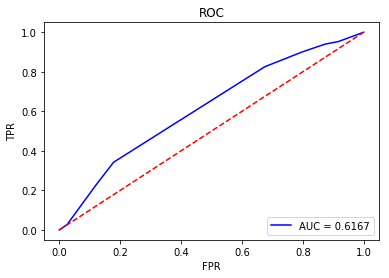

In [20]:
plot_roc(Y_test, y_pred_prob[:,-1])

# GBDT

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=1).fit(X_train,Y_train)
gbdt.score(X_test, Y_test)

0.6372549019607843

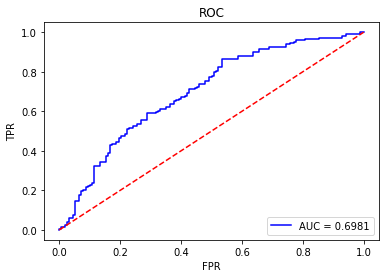

In [22]:
y_pred_prob = gbdt.predict_proba(X_test)
plot_roc(Y_test, y_pred_prob[:,-1])

# Random Forest

In [42]:
%%time
rforest= RandomForestClassifier(criterion='entropy')
rforest.fit(X_train,Y_train)
y_pred = rforest.predict(X_test)
cnf_matrix_rf = confusion_matrix(Y_test, y_pred)
print("======Model Accuracy=======") 
print ("RF Train Accuracy :: ", accuracy_score(Y_train, rforest.predict(X_train)))
print ("RF Test Accuracy  :: ", accuracy_score(Y_test, y_pred))
print('\n')
print("======Classification Report=======") 
print(classification_report(Y_test,y_pred))

======Model Accuracy=======
RF Train Accuracy ::  1.0
RF Test Accuracy  ::  0.6535947712418301


======Classification Report=======
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       157
           1       0.63      0.70      0.66       149

    accuracy                           0.65       306
   macro avg       0.66      0.65      0.65       306
weighted avg       0.66      0.65      0.65       306

CPU times: user 804 ms, sys: 5.46 ms, total: 809 ms
Wall time: 809 ms


In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import roc_auc_score, make_scorer, confusion_matrix, classification_report, f1_score

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
score = make_scorer(roc_auc_score)
parameters = {'n_estimators':(10,15,20),
              'criterion':('gini','entropy'),
              'min_samples_split':(2,3,4),
              'min_samples_leaf':(1,2,3)}

# random state?
rfc = RandomForestClassifier(random_state=1, warm_start=False, class_weight='balanced')
#grid_obj = GridSearchCV(rfc, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
#grid_obj = grid_obj.fit(X_train, Y_train)
#rfc = grid_obj.best_estimator_
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
y_pred_prob = rfc.predict_proba(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)
#print('Train Dataset score {}'.format(rfc.score(X_train, Y_train)))
#print('Test Dataset score {}'.format(rfc.score(X_test, Y_test)))

0.6666666666666666


# Nested Cross Validation - Random Forest

In [40]:
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
# Set up possible values of parameters to optimize over
p_grid = {'n_estimators':(10,50,100), #tune
              'criterion':('gini','entropy'),
              'min_samples_split':(2,3,4),
              'min_samples_leaf':(1,2,3)}
# max_depth, max_features

rfc = RandomForestClassifier(random_state=1, warm_start=False, class_weight='balanced')

# Choose techniques for the inner and outer loop of nested cross-validation
inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=1)

# Perform nested cross-validation
clf = GridSearchCV(estimator=rfc, param_grid=p_grid, cv=inner_cv, iid=False)
clf.fit(X_train, Y_train)
best_estimator = clf.best_estimator_

cv_dic = cross_validate(rfc, X_train, Y_train, cv=outer_cv, scoring=['accuracy'], return_estimator=False, return_train_score=True)
mean_val_score = cv_dic['test_accuracy'].mean()

print('nested_train_scores: ', cv_dic['train_accuracy'])
print('nested_val_scores:   ', cv_dic['test_accuracy'])
print('mean score:            {0:.2f}'.format(mean_val_score))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


nested_train_scores:  [1. 1. 1. 1.]
nested_val_scores:    [0.67320261 0.70261438 0.77124183 0.67540984]
mean score:            0.71


In [26]:
cross_val_score(rfc, X_train, Y_train, cv=4)

array([0.73529412, 0.66339869, 0.73529412, 0.68196721])

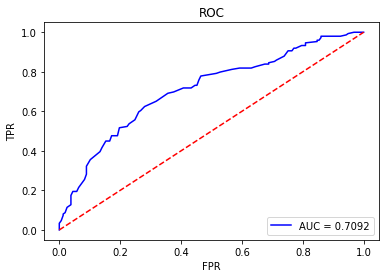

In [27]:
plot_roc(Y_test, y_pred_prob[:,-1])
# only one data point?
# prob not label

# Xgboost

In [28]:
'''
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]
'''

'\nimport re\nregex = re.compile(r"\\[|\\]|<", re.IGNORECASE)\nX_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set((\'[\', \']\', \'<\'))) else col for col in X_train.columns.values]\nX_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set((\'[\', \']\', \'<\'))) else col for col in X_test.columns.values]\n'

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27) 
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
y_pred_prob = xgb.predict_proba(X_test)
cnf_matrix_dtree=confusion_matrix(Y_test,Y_pred)
print("======Model Accuracy=======") 
print ("Xgboost Train Accuracy :: ", accuracy_score(Y_train, xgb.predict(X_train)))#no need
print ("Xgboost Test Accuracy  :: ", accuracy_score(Y_test, Y_pred))

======Model Accuracy=======
Xgboost Train Accuracy ::  1.0
Xgboost Test Accuracy  ::  0.6535947712418301


In [30]:
cross_val_score(xgb, X_train, Y_train, cv=5) #5fold
#random state

array([0.71836735, 0.71020408, 0.72653061, 0.70901639, 0.74590164])

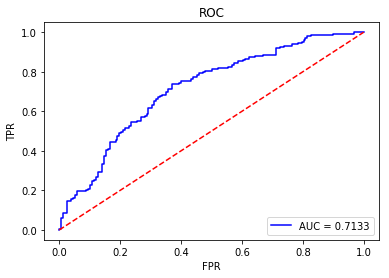

In [31]:
plot_roc(Y_test, y_pred_prob[:,-1])

# SVM

In [32]:
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='rbf', gamma='auto', decision_function_shape='ovr', cache_size=500)
svm_prob = SVC(probability=True)
y_pred = svm.fit(X_train, Y_train).predict(X_test)
y_pred_prob = svm_prob.fit(X_train, Y_train).predict_proba(X_test)

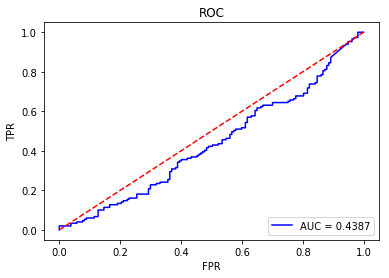

In [33]:
plot_roc(Y_test, y_pred_prob[:,-1])

In [37]:
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Choose techniques for the inner and outer loop of nested cross-validation
inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=1)

# Perform nested cross-validation
clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, iid=False)
clf.fit(X_train, Y_train)
best_estimator = clf.best_estimator_

cv_dic = cross_validate(clf, X_train, Y_train, cv=outer_cv, scoring=['accuracy'], return_estimator=False, return_train_score=True)
mean_val_score = cv_dic['test_accuracy'].mean()

print('nested_train_scores: ', cv_dic['train_accuracy'])
print('nested_val_scores:   ', cv_dic['test_accuracy'])
print('mean score:            {0:.2f}'.format(mean_val_score))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed 

nested_train_scores:  [0.51472192 0.52671756 0.51035987 0.51851852]
nested_val_scores:    [0.51633987 0.48366013 0.47058824 0.51147541]
mean score:            0.50
